In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("cleaned_data_eda.csv")

# Standardization

In [3]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
numeric_data = data.select_dtypes(include=['float64', 'int64'])
scaled_data = scaler.fit_transform(numeric_data)
data_scaled= pd.DataFrame(scaled_data, columns=numeric_data.columns)

In [4]:
data.shape 
data_scaled.shape

(614, 5)

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,146,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y


In [6]:
data_scaled.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,-0.554487,-0.004733,0.273231,0.411733
1,-0.134412,-0.038731,-0.219097,0.273231,0.411733
2,-0.393747,-0.554487,-0.957465,0.273231,0.411733
3,-0.462062,0.251980,-0.314371,0.273231,0.411733
4,0.097728,-0.554487,-0.064278,0.273231,0.411733


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.00000,614.000000,614.000000,614.000000
mean,5403.459283,1621.24430,146.397394,342.410423,0.855049
std,6109.041673,2926.24876,84.037503,64.428629,0.352339
min,150.000000,0.00000,9.000000,12.000000,0.000000
25%,2877.500000,0.00000,100.250000,360.000000,1.000000
50%,3812.500000,1188.50000,129.000000,360.000000,1.000000
75%,5795.000000,2297.25000,164.750000,360.000000,1.000000
max,81000.000000,41667.00000,700.000000,480.000000,1.000000


In [8]:
data_scaled.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,-4.339634e-18,3.182398e-17,1.620130e-16,5.930833e-17,-1.620130e-16
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-8.606493e-01,-5.544867e-01,-1.636286e+00,-5.132498e+00,-2.428760e+00
25%,-4.138159e-01,-5.544867e-01,-5.495763e-01,2.732313e-01,4.117327e-01
50%,-2.606393e-01,-1.480042e-01,-2.071882e-01,2.732313e-01,4.117327e-01
75%,6.414426e-02,2.312028e-01,2.185640e-01,2.732313e-01,4.117327e-01
max,1.238462e+01,1.369617e+01,6.592937e+00,2.137276e+00,4.117327e-01


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

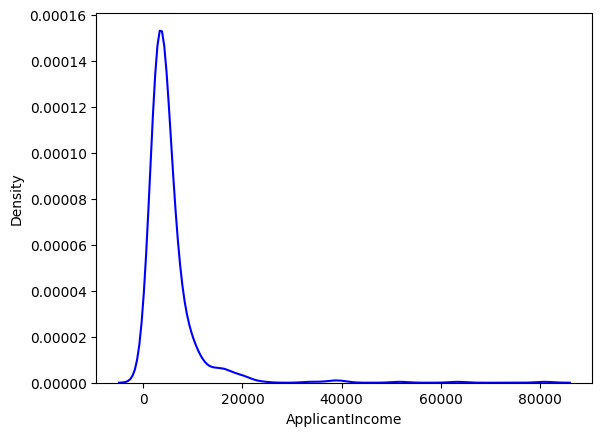

In [9]:
sns.kdeplot(data['ApplicantIncome'], label="Before Scaling", color="blue")

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

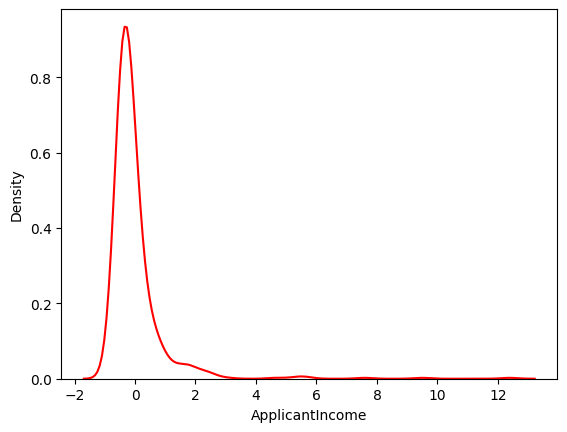

In [10]:
sns.kdeplot(data_scaled['ApplicantIncome'], label="AfterScaling", color="red")

##### It can be seen that normalisation has changed the scale of values without affecting their relative difference

## Effect of scaling

Text(0.5, 1.0, 'Before Scaling')

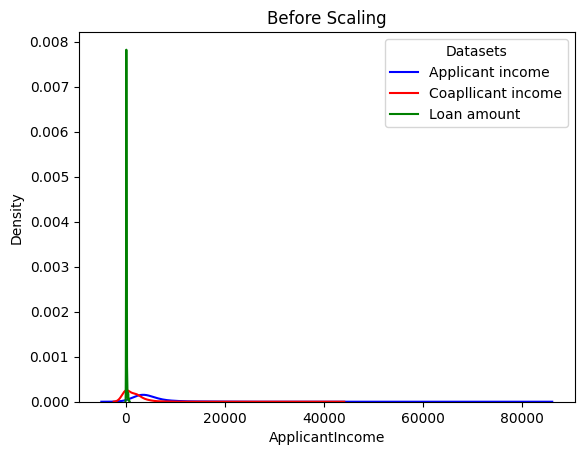

In [11]:
sns.kdeplot(data['ApplicantIncome'], label="Applicant income", color="blue")
sns.kdeplot(data['CoapplicantIncome'], label="Coapllicant income", color="red")
sns.kdeplot(data['LoanAmount'], label="Loan amount", color="green")
plt.legend(title="Datasets")
plt.title('Before Scaling')

Text(0.5, 1.0, 'After Scaling')

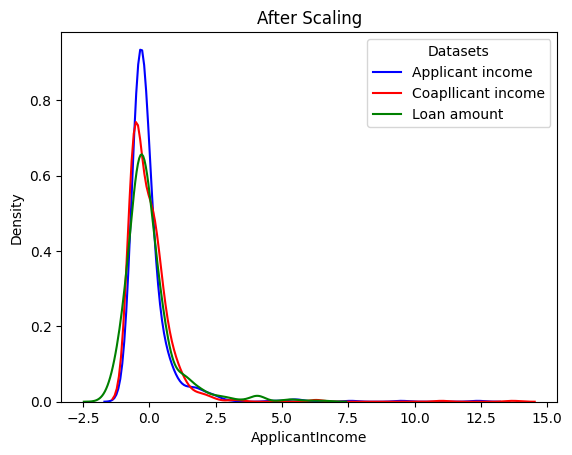

In [12]:
sns.kdeplot(data_scaled['ApplicantIncome'], label="Applicant income", color="blue")
sns.kdeplot(data_scaled['CoapplicantIncome'], label="Coapllicant income", color="red")
sns.kdeplot(data_scaled['LoanAmount'], label="Loan amount", color="green")
plt.legend(title="Datasets")
plt.title('After Scaling')

# Encoding

In [13]:
encode_data = data.select_dtypes(exclude=['float64', 'int64'])

In [14]:
encode_data.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
429,LP002370,Male,No,0,Not Graduate,No,Urban,Y
285,LP001924,Male,No,0,Graduate,No,Rural,Y
23,LP001050,Male,Yes,2,Not Graduate,No,Rural,N
135,LP001488,Male,Yes,3+,Graduate,No,Semiurban,N
50,LP001155,Female,Yes,0,Not Graduate,No,Semiurban,Y


## Ordinal Encoding

#### Ordinal columns in the data set:
- Dependents
- Education

In [15]:
from sklearn.model_selection import train_test_split

X = encode_data[['Dependents', 'Education']]
y = encode_data[['Loan_Status']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
X_train

,Dependents,Education
197,0,Not Graduate
97,0,Graduate
184,0,Graduate
538,0,Not Graduate
87,0,Graduate
...,...,...
166,0,Graduate
195,1,Graduate
49,0,Graduate
583,1,Graduate


In [18]:
from sklearn.preprocessing import OrdinalEncoder

In [19]:
oe = OrdinalEncoder(categories=[['0', '1', '2', '3+'],['Not Graduate', 'Graduate']])

In [20]:
oe.fit(X_train)

OrdinalEncoder(categories=[['0', '1', '2', '3+'], ['Not Graduate', 'Graduate']])

In [21]:
X_train= oe.transform(X_train)
X_test = oe.transform(X_test)

In [22]:
X_train

array([[0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [2., 1.],
       [0., 1.],
       [0., 1.],
       [3., 1.],
       [3., 0.],
       [2., 1.],
       [0., 1.],
       [3., 1.],
       [3., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [2., 1.],
       [0., 1.],
       [0., 1.],
       [3., 1.],
       [2., 0.],
       [2., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [0., 1.],
       [2., 0.],
       [0., 0.],
       [0., 0.],
       [2., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [0., 0.],
       [2., 0.],
       [0., 1.],
       [0., 1.],
       [2., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [2., 1.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.